# Projektarbeit Applied Data Science
Die COVID-19-Pandemie hat sich rasch auf unser tägliches Leben ausgewirkt und den Welthandel und -verkehr gestört.
Das Tragen einer Gesichtsschutzmaske ist zu einer neuen Normalität geworden. In naher Zukunft werden viele öffentliche Dienstleister ihre Kunden auffordern, Masken zu tragen, um ihre Dienste in Anspruch nehmen zu können.
Die Erkennung von Gesichtsmasken ist daher zu einer wichtigen Aufgabe für die globale Gesellschaft geworden.

In diesem Projekt wird ein vereinfachter Ansatz zur Erreichung dieses Ziels vorgestellt.
Daüf werden grundlegende Machine Learning Frameworks wie TensorFlow und Keras verwendet.
Die vorgeschlagene Methode erkennt das Gesicht auf dem Bild korrekt und identifiziert dann, ob es eine Maske trägt oder nicht.

# Schritt 1: Datenbezug
Um genügend Daten für das Modell zusammenzutragen wurden drei verschiedene Methoden verwendet:
- Webscraping von Instagram mittels Selenium
- Webscraping der Google Bildersuche mittels Beautiful Soup
- Datenbezug über die API von Tumblr

Die Gruppe hat sich aus autodidaktischen Gründen für diese Methoden entschieden.
So konnte das persönliche Wissen in den verschiedenen Vorgehensweisen vertieft werden.

## Webscraping von Instagram mittels Selenium
Untenstehender Code zeigt wie ein definierter Hashtag in Instagram gesucht werden kann und die Suchergebnisse gespeichert werden. Für das Projekt wurde ein eigener Instagram-Account erstellt.
Für den Datenbezug der Klasse "Mask" wurde zunächst nach #coronamask und #covidmask gesucht.
Die Daten für die Klasse "No_Mask" wurden mit den Suchbegriffen #people und "face" gesucht.

Der Scraper hat 36 Bilder pro Durchlauf gespeichert.

Die Qualität der Bilder ist für unser Projekt nicht optimal. Die Suchbegriffe liefern nicht immer passende Bilder.
Teilweise fehlen Personen oder die Suchbegriffe entsprechen nicht den gefundenen Bildern.
Dieses Problem wird im Schritt "Datenaufbereitung" behandelt.

In [1]:
#imports
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

#Warnings settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#specify the path to chromedriver.exe (download and save on your computer)
driver = webdriver.Chrome('C:/Users/tom-w/Tools/chromedriver_win32/chromedriver.exe')

#open the webpage
driver.get("http://www.instagram.com")

#Deny Cookies
cookies = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Nur erforderliche Cookies erlauben")]'))).click()


In [3]:
#target username
username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))

#enter username and password
username.clear()
username.send_keys("willetho3114")
password.clear()
password.send_keys("Projektarbeit2022$")

#target the login button and click it
button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()

print('Login successfull!')

Login successfull!


In [4]:
#Button "Jetzt nicht"
not_now = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Jetzt nicht")]'))).click()
not_now2 = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Jetzt nicht")]'))).click()

In [17]:
import time

#target the search input field
searchbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Suchen']")))
searchbox.clear()

#search for the hashtag
keyword = "#face" #weitere Suchanfragen: "#covidmask", "coronamask", "people", "face"
searchbox.send_keys(keyword)
 
# Wait for 5 seconds
time.sleep(5)
searchbox.send_keys(Keys.ENTER)
time.sleep(5)
searchbox.send_keys(Keys.ENTER)
time.sleep(5)

In [18]:
#scroll down to scrape more images
driver.execute_script("window.scrollTo(0, 10000);")

#target all images on the page
images = driver.find_elements_by_tag_name('img')
images = [image.get_attribute('src') for image in images]

print('Number of scraped images: ', len(images))

Number of scraped images:  36


In [19]:
import os
import wget

path = os.getcwd()
path = os.path.join(path, keyword[1:] + 's')

#create the directory
os.mkdir(path)

path

'C:\\Users\\tom-w\\Projekt_ADS_Gruppe13\\faces'

In [20]:
#download images
counter = 0
for image in images:
    save_as = os.path.join(path, keyword[1:] + str(counter) + '.jpg')
    wget.download(image, save_as)
    counter += 1

## Webscraping der Google Bildersuche mittels Beautiful Soup
Als weitere Datenquelle haben wir Google genutzt. Der untenstehende Code zeigt, wie mittels BeautifulSoup Bilder gescrapet werden können. Die Suchbegriffe und die gewünschte Anzahl Bilder können hier direkt durch den Benutzer eingegeben werden.

Als Suchbegriffe wurden erneut "coronamask", "covidmask", "people" und "face" verwendet.
Es wurden pro Suchbegriff 80 Bilder gespeichert. Total wurden zusätzlich 280 Bilder gescraped.

Um die Datenaufbereitung zu vereinfachen wurde der Counter zur Bennenung der Bilder so angepasst, dass durch den ganzen Datensatz eine fortlaufende Nummer verwendet wird.

In [21]:
import os
import requests
from bs4 import BeautifulSoup

In [22]:
Google_Img = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'

u_agnt = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
}

In [34]:
Img_Ord = 'Scrapped_Img'
def main():
    if not os.path.exists(Img_Ord):
        os.mkdir(Img_Ord)
    Scrap_img()
    
def Scrap_img():
    data = input('Such-Keywörter eingeben: ')
    anz_img = int(input('Wie viele Bilder: '))
    
    print('Bilder werden gesucht :)! Uno momento....')
    url = Google_Img + 'q=' + data
    
    response = requests.get(url, headers=u_agnt)
   
    b_sp = BeautifulSoup(response.text, 'html.parser')
    results = b_sp.findAll('img', {'class': 'rg_i Q4LuWd'})
    
    count = 0
    imglinks = []
    for res in results:
        try:
            link = res['data-src']
            imglinks.append(link)
            count = count + 1
            if (count >= anz_img):
                break
            
        except KeyError:
            continue
    
    print(f'{len(imglinks)} Bilder gefunden')
    print('Download wird gestartet...')

    for i, imglink in enumerate(imglinks):
        response = requests.get(imglink)
        
        img_name = Img_Ord + '/' + data + str(i+112) + '.jpg' #Anpassung der Konstante "i+x" zur Nummerierung der Bilder
        with open(img_name, 'wb') as file:
            file.write(response.content)

    print('Download abgschlossen! :)')
    
if __name__ == '__main__':
    main()

Such-Keywörter eingeben: faces
Wie viele Bilder: 80
Bilder werden gesucht :)! Uno momento....
80 Bilder gefunden
Download wird gestartet...
Download abgschlossen! :)


## Datenbezug über die API von Tumblr
Schliesslich wird die API von Tumblr verwendet um zusätzliche Bilder zu speichern.
Es wurden erneut die Suchbegriffe "coronamask", "covidmask", "people" und "faces" verwendet.

Über die Tumblr API wurden total zusätzlich je Klasse ca. 150 Bilder gescraped.

Die Qualität der Bilder ist, ähnlich wie bei Instagram, nicht optimal.
Dieses Problem wird im Schritt Datenaufbereitung behandelt.

In [36]:
import requests
import time
import shutil

In [55]:
LOOP = 5
URL = 'https://api.tumblr.com/v2/tagged'
payload = {
    'api_key': 'saORsssSfwsI1GuRZ3Tx5mAuZLLbmVih3BzqwC62aQb8eGitaf',
    'tag': 'coronamask'
}
image_idx = 0

photo_urls = []
for i in range(LOOP):
    response_json = requests.get(URL, params=payload).json()
    for data in response_json['response']:
        if data['type'] != 'photo':
            continue
        for photo in data['photos']:
            photo_urls.append(photo['original_size']['url'])
    if(len(response_json['response']) == 0):
        continue
    payload['before'] = response_json['response'][(len(response_json['response']) - 1)]['timestamp']

for photo_url in photo_urls:
    path = "C:/Users/tom-w/Projekt_ADS_Gruppe13/Scraped_API_NoMask/" + str(image_idx) + "_nomask.jpg "
    r = requests.get(photo_url, stream=True)
    if r.status_code == 200:
      with open(path, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)
      image_idx+=1

# Schritt 2: Datenaufbereitung
Es wurden total 479 Bilder für die Klasse "mask" und 467 Bilder für die Klasse "nomask" gescraped.
Diese Bilder bilden die Grundlage für die nächsten Schritte.

In diesem Schritt werden alle notwendigen Vorbereitungen inkl. Verarbeitung von unseren Bildern durchgeführt, um unser Convolutional Neural Network (CNN) trainieren zu können.
Unser Ziel ist es, ein CNN zu entwickeln und zu trainieren, das Bilder von Personen mit oder ohne Gesichtsmaske identifizieren kann.

### Organisation der Daten
Nun müssen wir die Verzeichnisstruktur auf der Festplatte organisieren, um den Datensatz aufzunehmen.
Wir werden einige Teile der Organisation manuell durchführen und den Rest programmatisch erledigen.

Aufgrund der schlechten Qualität der Instagram und Tumblr Bilder wurden einige Inputdaten manuell entfernt.
Nach der Bereinigung blieben total 386 Bilder für die Klasse "mask" und 358 Bilder für die Klasse "nomask" übrig.

In [56]:
#imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Mithilfe des folgenden Skripts organisieren wir unsere Daten in Trainings-, Validierungs- und Testdatensätze.
Dazu verschieben wir Teilmengen der Daten in Unterverzeichnisse für jeden einzelnen Datensatz.

In [60]:
#organize data into train, valid, test dirs

#create dirs
os.chdir('C:/Users/tom-w/Projekt_ADS_Gruppe13/02_Datenaufbereitung/')
if os.path.isdir('train/mask') is False:
    os.makedirs('train/mask')
    os.makedirs('train/nomask')
    os.makedirs('valid/mask')
    os.makedirs('valid/nomask')
    os.makedirs('test/unknown')
    
#Zuweisung Bilder in train, valid, test dirs
    for c in random.sample(glob.glob('nomask*'), 250):
        shutil.move(c, 'train/nomask')
    for c in random.sample(glob.glob('mask*'), 250):
        shutil.move(c, 'train/mask')
    for c in random.sample(glob.glob('nomask*'), 50):
        shutil.move(c, 'valid/nomask')
    for c in random.sample(glob.glob('mask*'), 50):
        shutil.move(c, 'valid/mask')
    for c in random.sample(glob.glob('nomask*'), 25):
        shutil.move(c, 'test/nomask')
    for c in random.sample(glob.glob('mask*'), 25):
        shutil.move(c, 'test/mask')
        
os.chdir('../../')

Anschliessend erstellen wir Variablen, denen die Pfade zu den Verzeichnissen für die train-, test- und valid-Daten zugewiesen werden.

In [61]:
train_path = 'C:/Users/tom-w/Projekt_ADS_Gruppe13/02_Datenaufbereitung/train'
valid_path = 'C:/Users/tom-w/Projekt_ADS_Gruppe13/02_Datenaufbereitung/valid'
test_path = 'C:/Users/tom-w/Projekt_ADS_Gruppe13/02_Datenaufbereitung/test'

Jetzt verwenden wir die Klasse "ImageDataGenerator" von Keras, um den batches aus den Verzeichnissen zu erstellen.
ImageDataGenerator.flow_from_directory() erzeugt einen DirectoryIterator, der Stapel von normalisierten Tensor-Bilddaten aus den jeweiligen Datenverzeichnissen erzeugt.

Bei flow_from_directory() geben wir zunächst den Pfad für die Daten an. Dann geben wir die Zielgröße der Bilder an, wodurch alle Bilder auf die angegebene Größe gebracht werden. Die Größe, die wir hier angeben, wird durch die Eingabegröße bestimmt, die das neuronale Netz erwartet.

Außerdem geben wir shuffle=False nur für test_batches an. Der Grund dafür ist, dass wir später, wenn wir die Auswertungsergebnisse des Modells in eine Confusion Matrix einzeichnen, auf die nicht gemischten Bezeichnungen für den Testsatz zugreifen können müssen. Standardmäßig sind die Datensätze gemischt.

In [64]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['mask', 'nomask'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['mask', 'nomask'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['mask', 'nomask'], batch_size=10, shuffle=False)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


### Visualisierung der Daten
Wir rufen nun next(train_batches) auf, um einen Batch von Bildern und Beschriftungen aus dem Trainingssatz zu erzeugen. Zu beachten ist, dass die Größe dieses Stapels durch die batch_size bestimmt wird, die wir bei der Erstellung von train_batches festgelegt haben.

In [68]:
imgs, labels = next(train_batches)

In [66]:
#This function will plot images in the form of a grid with 1 row and 10 columns where images are place

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Wir verwenden dann diese Plotting-Funktion aus der TensorFlow-Dokumentation, um die verarbeiteten Bilder in unserem Jupyter-Notebook darzustellen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

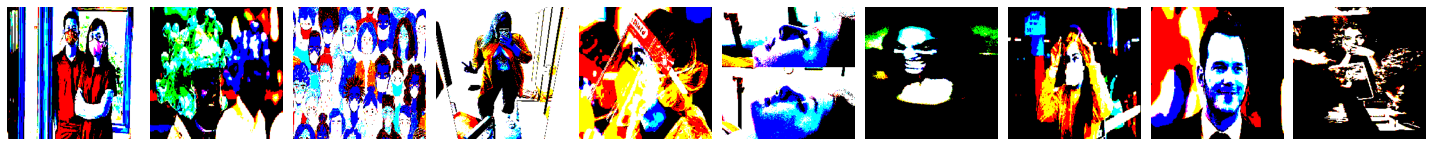

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [67]:
#shows how the training batch looks like (Farbverzerrung aufgrund vgg16)

plotImages(imgs)
print(labels)

So sieht der erste verarbeitete Zufallsstapel aus dem Trainingssatz aus. Zu beachten ist, dass die Farbe verzerrt wird. Das hat mit der VGG16-Verarbeitung zu tun, die wir auf die Datensätze angewandt haben.

Das one-hot-encoding [0,1] stellt die Klasse "mask" dar und [1,0] die Klasse "nomask".

Die Datenaufbereitung ist somit abgeschlossen.
Wir sind bereit die Daten für das Training unseres Convolutional Neural Netowrks zu verwenden.

# Schritt 3: Erstellung und Training eines Convolutional Neural Networks mit der Keras API von TensorFlow
In diesem Schritt wird ein einfaches Convolutional Neural Network erstellt und auf Bilder von Personen mit und ohne Maske mit der Keras API von TensorFlow trainiert.

Zum Aufbau des CNN verwenden wir das Sequential Model von Keras.
Der erste Layer des Modells ist ein zweidimensionaler Convolution-Layer. Dieser Layer hat 32 output filters mit einer Kernelgrösse von jeweils 3x3. Wir verwenden die relu Activation Function.

Zu beachten ist, dass die Wahl der Anzahl der angegebenen Output Filter willkürlich gewählt ist und dass die gewählte Kernelgrösse von 3x3 im Allgemeinen eine sehr gängige Grösse ist, die verwendet wird.

Zusätzlich wird zero-padding durch padding = 'same' aktiviert.

Nur auf dem ersten Layer geben wir auch die input_shape an, also die Form unserer Daten.
Unsere Bilder sind 224 Pixel hoch und 224 Pixel breit und haben 3 Farbkanäle: RGB.
Daraus ergibt sich ein input_shape von (224,224,3).

Wir fügen dann eine Max-Pooling-Schicht hinzu, um die Dimensionalität der Daten zu reduzieren.

Anschließend fügen wir einen weiteren Convolution-Layer mit den gleichen Spezifikationen wie der erste hinzu, mit dem Unterschied, dass dieser zweite Conv2D-Layer 64 Filter hat. Die Wahl von 64 ist auch hier willkürlich. Auf diesen Layer folgt wieder die gleiche Art von MaxPool2D-Layer.

Anschliessend wird der Output des Convolution-Layer geglättet und an einen Dense-Layer weitergeleitet.
Der Dense-Layer ist der Output-Layer des Netzes und hat daher nur noch zwei Knoten, einen für Personen mit und einen für Personen ohne Maske.
Wir wenden die Softmax Activation Function auf unseren Output an. Somit ist der Output des CNN für jedes Sample eine Wahrscheinlichkeitsverteilung über die zwei Klassen.

In [69]:
#Build the model

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

Wir können uns nun eine Zusammenfassung des Modells ansehen, indem wir model.summary() aufrufen.

In [70]:
#look at model-stats

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

Nun, da das Modell erstellt ist, kompilieren wir das Modell mit dem Adam-Optimierer mit einer Lernrate von 0,0001, einem Loss von categorical_cross_entropy, und wir wählen accuracy als unsere Metric aus.

Da wir nur zwei Klassen behandeln könnten wir auch binary_crossentropy als Loss definieren.
Beide Optionen funktionieren gleich gut und erzielen genau das gleiche Ergebnis.
Wenn aber binary_crossentropy gebraucht werden würde, dann müsste die Activation Function von Softmax auf Sigmoid verändert werden.

In [71]:
#compile the model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Wir verwenden nun die model.fit() Funktion um unser Modell zu trainieren.

Wir geben 10 als die Anzahl der Epochen an, die wir ausführen möchten, und setzen den Parameter verbose auf 2, der lediglich die Ausführlichkeit der Protokollausgabe angibt, die während des Trainings auf der Konsole ausgegeben wird.

Wenn wir diese Codezeile ausführen, können wir die Ausgabe des Modells über 10 Epochen sehen.

In [72]:
#train the model

model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
50/50 - 21s - loss: 32.0427 - accuracy: 0.5680 - val_loss: 11.8225 - val_accuracy: 0.4600
Epoch 2/10
50/50 - 20s - loss: 4.7495 - accuracy: 0.7920 - val_loss: 53.5283 - val_accuracy: 0.5000
Epoch 3/10
50/50 - 19s - loss: 3.4504 - accuracy: 0.8440 - val_loss: 21.4428 - val_accuracy: 0.4700
Epoch 4/10
50/50 - 19s - loss: 3.4524 - accuracy: 0.8420 - val_loss: 9.8051 - val_accuracy: 0.5500
Epoch 5/10
50/50 - 19s - loss: 0.7682 - accuracy: 0.9340 - val_loss: 16.1819 - val_accuracy: 0.5600
Epoch 6/10
50/50 - 19s - loss: 0.1277 - accuracy: 0.9860 - val_loss: 18.8791 - val_accuracy: 0.5400
Epoch 7/10
50/50 - 18s - loss: 0.0322 - accuracy: 0.9920 - val_loss: 14.5663 - val_accuracy: 0.5600
Epoch 8/10
50/50 - 19s - loss: 0.0109 - accuracy: 0.9960 - val_loss: 11.0359 - val_accuracy: 0.5500
Epoch 9/10
50/50 - 18s - loss: 0.0073 - accuracy: 0.9960 - val_loss: 11.0846 - val_accuracy: 0.5500
Epoch 10/10
50/50 - 18s - loss: 0.0534 - accuracy: 0.9940 - val_loss: 10.7800 - val_accuracy: 0.5600

Anhand dieser Ausgabe können wir sehen, dass die Leistung dieses einfachen Modells auf dem Trainingsdatensatz grossartig ist.
Das Modell erreicht eine Genauigkeit von fast 100% und ein Loss von nahe zu Null.
Wenn wir diese Ergebnisse jedoch mit den Validierungsmetriken vergleichen, können wir sehen, dass unser Modell die Trainingsdaten bei weitem overfittet.

An diesem Punkt könnten wir weiter an diesem Modell arbeiten, um dem Overfit entgegenzuwirken.
Eine weitere Vorgehensweise ist der Einsatz eines pre-trained models auf unsere Daten.
Die Implementierung von Transfer Learning wird in einem späteren Schritt behandelt.

# Schritt 4: CNN Prognosen
Unser CNN wurde erstellt und trainiert.
Wir haben festgestellt, dass dieses Modell im Trainingsset sehr gu funktioniert hat, aber nicht so gut auf das Validierungsset verallgemeinert werden konnte.
Nichtsdestotrotz werden wir jetzt sehen, wie sich unser Modell bei der Vorhersage von Bildern von Personen mit und ohne Masek in unserem Testset schlägt.

In Anbetracht der nicht so guten Ergebnisse, die wir bei der Validierung gesehen haben, gehen wir davon aus, dass das Modell im Testset nicht besser abschneiden wird.

### Vorbereitung der Testdaten
Wir führen nun next(test_batches) aus, um einen Batch von Bildern und die entsprechenden Labels aus dem Testsatz zu extrahieren.
Mit der Funktion plotImages() können wir sehen, wie dieser Batch von Testdaten aussieht.

Da wir bei der Erstellung unseres Testdatensatzes shuffle aktiviert haben, besteht die erste Hälfte der Testdaten nur aus Personen mit Masken und die zweite Hälfte nur Personen ohne Masken. Weiter zu beachten ist, dass die Farbdaten aufgrund der VGG16-Vorverarbeitung, die wir bei der Erstellung der Datensätze festgelegt haben, verzerrt erscheinen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

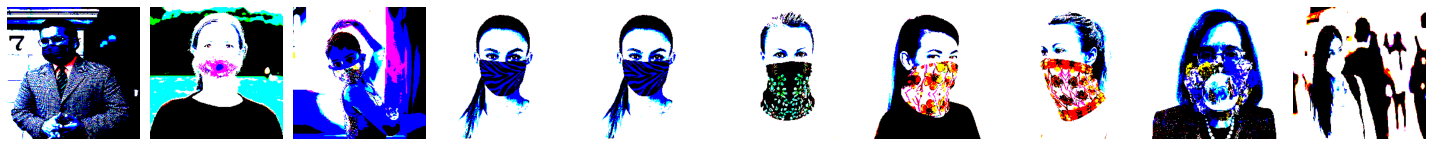

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [73]:
#Preparing the test data

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [74]:
#zeigt das "sortierte" testdataset, shuffle
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

### Vorhersage anhand der Testdaten
Nun verwenden wir unser zuvor erstelltes Modell und rufen model.predict() auf, um das Modell das Testset vorhersagen zu lassen.
Wir geben das Testset test_batches ein und setzen steps auf die Länge von test_batches.
Ähnlich wie steps_per_epoch gibt steps an, wie viele Batches aus dem Testset ausgegeben werden sollen, bevor eine "Vorhersagerunde" für abgeschlossen erklärt wird.

Wir geben auch verbose=0 an, um keine Ausgaben während des Evaluierungsprozesses zu sehen.

In [76]:
#predict on the test data

predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

Nachdem wir die Prognose durchgeführt haben, können wir die gerundeten Predictions ausdrucken und sehen, wie sie aussehen.

In [77]:
#After running the predictions, we can print our the rounded predictions see what they look like.

np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Erstellen von Prognosen mit einer Confusion Matrix
Um die Ergebnisse besser darstellen zu können verwenden wir eine Confusion Matrix.

In [79]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [80]:
#We then define the plot_confusion_matrix() function that is copied directly from scikit-learn.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
#We can then inspect the class_indices for the labels so that we know in which order to pass them to our confusion matrix.

test_batches.class_indices

{'mask': 0, 'nomask': 1}

Confusion matrix, without normalization
[[13 12]
 [ 5 20]]


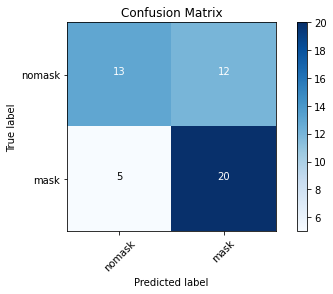

In [82]:
#Finally, we plot the confusion matrix

cm_plot_labels = ['nomask','mask']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Wir sehen, dass 17 von 50 Bilder falsch klassifiziert wurden.
In Anbetracht dessen, was wir beim letzten Mal bei den Validierungsmetriken gesehen haben, sind diese Ergebnisse nicht überraschend.

# Schritt 5: Data Augmentation mit TensorFlow's Keras API
Um unser Modell weiter zu verbessern, wollen wir Data Augmentation einsetzen.
Es soll uns helfen, mehr Daten für das Training zu erhalten.
Vielleicht haben wir ein zu kleines Trainingsset.
Wir erweitern unsere vorhandenen Daten und fügen diese dem Trainingsset hinzu.

In [84]:
#imports

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [130]:
#Next, we'll use this plotImages() function obtained from TensorFlow's documentation to plot the processed images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [131]:
#create ImageDataGenerator

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [132]:
#choose a random image

chosen_image = random.choice(os.listdir('C:/Users/tom-w/Projekt_ADS_Gruppe13/02_Datenaufbereitung/train/nomask'))

In [133]:
#We then create a variable called image_path and set that to the relative location on disk of the chosen image

image_path = 'C:/Users/tom-w/Projekt_ADS_Gruppe13/02_Datenaufbereitung/train/nomask/' + chosen_image

In [134]:
#define image

image = np.expand_dims(plt.imread(image_path),0)

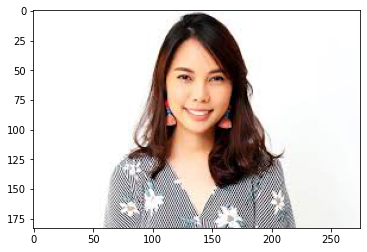

In [135]:
#plot image

plt.imshow(image[0])

In [136]:
#generate batches of augmented images from this image

aug_iter = gen.flow(image)

In [137]:
# get 10 samples of augmented images

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

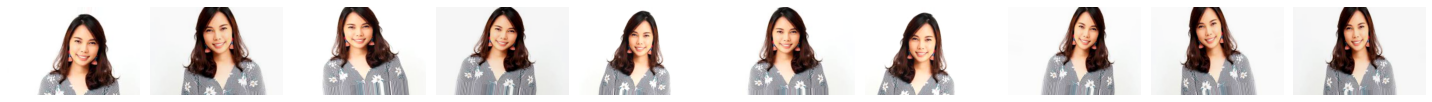

In [138]:
# Augmented images

plotImages(aug_images)

In [139]:
#Save the augmented data

aug_iter = gen.flow(image, save_to_dir='C:/Users/tom-w/Projekt_ADS_Gruppe13/02_Datenaufbereitung/train/nomask/', save_prefix='aug-image-', save_format='jpeg')

Dieses Vorgehen kann nun für beide Klassen wiederholt werden um aus den bestehenden Bildern mehr Trainingsdaten zu generieren.

# Schritt 6: Fine-Tuned Neural Network mit VGG16 und ImageNet
Wir werden nun versuchen unser Modell mithilfe eines vortrainierten Modells zu verbessern.
Wir testen VGG16. Dieses Modell hat 2014 den ImageNet-Wettbewerb gewonnen.

Beim ImageNet-Wettbewerb treten mehrere Teams gegeneinander an, um ein Modell zu erstellen, das Bilder aus der ImageNet-Bibliothek am besten klassifiziert.
Die ImageNet-Bibliothek enthält Tausende von Bildern, die zu 1000 verschiedenen Kategorien gehören.

Wir werden dieses VGG16-Modell importieren und es dann mit Keras weiter abstimmen.
Das feinabgestimmte Modell klassifiziert Bilder nicht als eine der 1000 Kategorien, für die es trainiert wurde, sondern nur als Personen mit bzw. ohne Maske.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

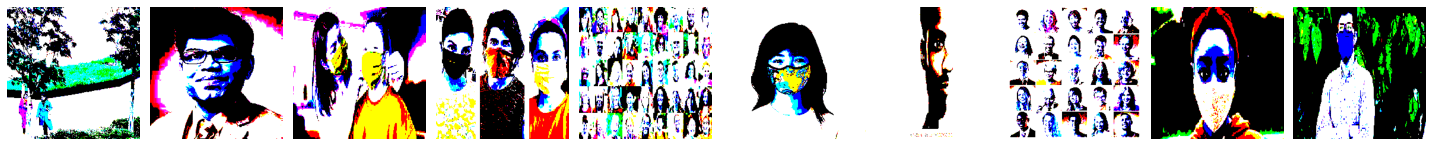

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [140]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

Wir haben bereits darauf hingewiesen, dass die Farbdaten aufgrund der Vorverarbeitung der Bilder mit der Funktion tf.keras.applications.vgg16.preprocess_input verzerrt werden.

Um zu verstehen, welche Vorverarbeitung für Bider erforderlich ist, die an ein VGG16-Modell übergeben werden, kann das VGG16-Paper beigezogen werden. --> https://arxiv.org/pdf/1409.1556.pdf

Unter dem Abschnitt 2.1 Architecture erklären die Autoren: "The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."

Diese Verarbeitung ist die Ursache dafür, dass die zugrunde liegenden Farbdaten verzerrt aussehen.

### Import VGG16 von Keras
Als nächstes Importieren wir das VGG16-Modell aus Keras.

Das vortrainierte Modell wird zusammen mit den gespeicherten Weights und anderen Parametern aus unseren Rechner heruntergeladen.

Wir können uns eine Zusammenfassung des Modells ansehen.
Mittels vgg16_model.summary() sehen wir die Architektur des Modells.

In [141]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 129s 0us/step


In [142]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Anpassung des Modells
Unser erstes CNN war viel einfacher aufgebaut. VGG16 ist viel komplexer und ausgefeilter.
Es hat viel mehr Layer als unser vorheriges Modell.

Zu beachten ist, dass der letzte Dense-Layer 1000 Outputs hat.
Diese Outputs entsprechen den 1000 Kategorien der ImageNet-Bibliothek.

Da wir nur zwei Kategorien klassifizieren werden, müssen wir dieses Modell anpassen.
Bevor wir das tun, sollten wir beachten, dass die Keras-Modelle, mit denen wir bisher in dieser Serie gearbeitet haben, vom Typ Sequential waren.
Wenn wir uns den Typ des Modells vgg16_model ansehen, sehen wir, dass es vom Typ Model ist, der aus der funktionalen API von Keras stammt.
Wir werden also zunächst das Functional Model in ein Sequential Model umwandeln.

In [143]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

Zunächst wird ein neues Modell vom Typ Sequential erstellt.
Anschließend werden alle Ebenen in vgg16_model mit Ausnahme der letzten Ebene durchlaufen und dem neuen Modell "Sequential" hinzugefügt.

In [145]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

Jetzt haben wir das gesamte vgg16_model (mit Ausnahme des Output-Layer) in ein neues sequenzielles Modell repliziert, dem wir gerade den Namen model gegeben haben.

Als Nächstes iterieren wir über jeden der Layer in unserem neuen sequenziellen Modell und setzen sie auf nicht trainierbar. Dadurch werden die Gewichte und andere trainierbare Parameter in jedem Layer eingefroren, sodass sie nicht trainiert oder aktualisiert werden, wenn wir später unsere Bilder von Personen mit und ohne Masek einfügen.

In [146]:
for layer in model.layers:
    layer.trainable = False

Als nächstes fügen wir unseren neuen Output Layer hinzu, der nur aus 2 Nodes besteht, die Personen mit und ohne Maske entsprechen.
Dieser Output Layer wird der einzige trainierbare Layer des Modells sein.

In [147]:
model.add(Dense(units=2, activation='softmax'))

Wir können uns nun eine Zusammenfassung unseres Modells ansehen und sehen, dass alles genau so ist wie beim ursprünglichen vgg16_model, außer dass der Output Layer jetzt nur noch 2 statt 1000 Nodes hat und die Anzahl der trainierbaren Parameter drastisch gesunken ist, da wir alle Parameter in den früheren Schichten eingefroren haben.

In [148]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Training des Fine-Tuned CNN
Als erstes muss unser neues Modell kompiliert werden.
Ähnlich wie bei unserem ersten Modell verwenden wir den Optimizer Adam mit einer Lernrate von 0.0001, categorical_crossentropy als Loss Function und accuracy als unsere Metric.

In [149]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Jetzt werden wir das Modell mit model.fit() trainieren.
Wir übergeben unsere Trainingsdaten und geben alle anderen Parameter auf genau dieselbe Weise wie zuvor an.

In [155]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
50/50 - 121s - loss: 0.1468 - accuracy: 0.9420 - val_loss: 0.3849 - val_accuracy: 0.8400
Epoch 2/10
50/50 - 116s - loss: 0.1203 - accuracy: 0.9660 - val_loss: 0.3885 - val_accuracy: 0.8400
Epoch 3/10
50/50 - 119s - loss: 0.1013 - accuracy: 0.9740 - val_loss: 0.4040 - val_accuracy: 0.8100
Epoch 4/10
50/50 - 121s - loss: 0.0869 - accuracy: 0.9800 - val_loss: 0.3746 - val_accuracy: 0.8400
Epoch 5/10
50/50 - 118s - loss: 0.0761 - accuracy: 0.9860 - val_loss: 0.3917 - val_accuracy: 0.8300
Epoch 6/10
50/50 - 118s - loss: 0.0654 - accuracy: 0.9900 - val_loss: 0.3942 - val_accuracy: 0.8200
Epoch 7/10
50/50 - 118s - loss: 0.0584 - accuracy: 0.9960 - val_loss: 0.3888 - val_accuracy: 0.8300
Epoch 8/10
50/50 - 119s - loss: 0.0521 - accuracy: 0.9980 - val_loss: 0.3862 - val_accuracy: 0.8400
Epoch 9/10
50/50 - 120s - loss: 0.0473 - accuracy: 0.9980 - val_loss: 0.3817 - val_accuracy: 0.8400
Epoch 10/10
50/50 - 120s - loss: 0.0424 - accuracy: 0.9980 - val_loss: 0.3861 - val_accuracy: 0.8300

## Ergebnisse
Ein Blick auf die Trainingsergebnisse zeigt, dass wir bereits nach 5 Epochen hervorragende Ergebnisse erzielt haben, insbesondere wenn man sie mit den Ergebnissen unseres ursprünglichen Modells vergleicht.

Unsere Genauigkeit beginnt bei 94% und steigt in nur 6 Epochen auf über 99 %.
Auch die Validierungsgenauigkeit hat sich seit dem letzten Mal verbessert.

## Prognosen mit dem Fine-Tuned CNN

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

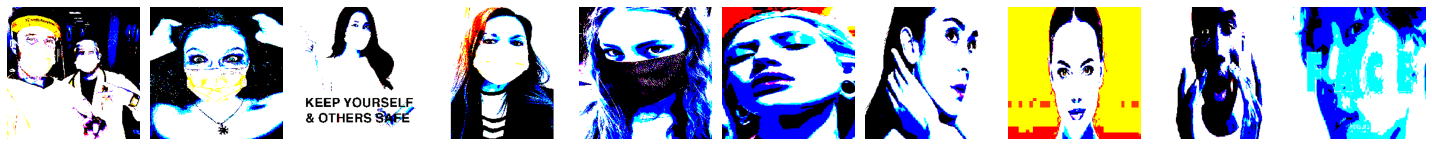

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [160]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [167]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

Wir werden nun eine Confusion Matrix erstellen, um unsere Vorhersagen zu visualisieren.
Der Code, den wir dazu verwenden werden, ist genau derselbe, den wir beim ersten Modell verwendet haben.

Confusion matrix, without normalization
[[21  4]
 [ 1 24]]


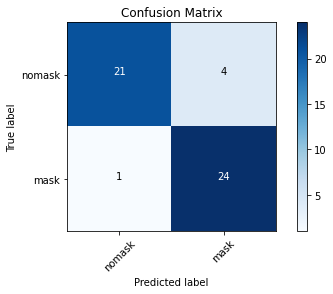

In [168]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['nomask','mask']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Ergebnisse
Wir sehen, dass das Modell nur 5 von 50 Proben falsch vorhersagte.
Was beweist, dass dieses Modell viel besser verallgemeinern kann als das vorherige CNN, das wir von Grund auf neu erstellt haben.

# Fazit
Wir haben die TensorFlow-Library und ihre integrierte Keras-API für folgende Schritte genutzt:
- Verarbeitung von Datensätzen
- Erstellung und Training von neuronalen Netzen
- Erweiterung von Datensätzen mittels Data Augmentation
- Bereits vorhandene Modelle zu verfeinern
- Prognosen mittels CNN

Die Verwendung einer neuronalen Netzwerk-API wie TensorFlow erlaubt uns, schnell und effizient mit neuronalen Netzwerkarchitekturen, Datensätzen und Trainingsprozessen zu experimentieren.

Die Beschaffung von geeigneten Daten für unser Projekt hat sich als schwierig herausgestellt.
Die Qualität der Bilder von Instagram und Tumblr war nicht optimal.
Im Nachhinein wäre beispielsweise die Erstellung eines custom computer vision Python script interessant gewesen.
Damit hätten Gesichtsmasken zu Bildern von Personen ohne Maske artifiziel hinzugefügt werden können.

Aufgrund der problematischen Datenbeschaffung war auch die Datenverarbeitung eine Herausforderung.

Abschliessend halten wir fest, dass die Problemstellung mit unserem Model gelöst werden kann.
Das Projekt eignet sich als Ansatzpunkt für weiterführende Entwicklungen.

Folgende Inhalte werden in der Präsentation behandelt und sind nicht Bestandteil dieses Notebooks:
- Weiterführend wurde eine forschungsbasierte Analyse der ethischen Fragestellung und potenzieller Risiken/Bias des entwickelten Produkts durchgeführt
- Jupyter-Notebook via Sagemaker

Sämtliche Daten des Projekts sind versioniert auf GitHub verfügbar.
